# Proyecto Final – Análisis Exploratorio de Datos (EDA) y Dashboard  
## Airbnb New York City (2019)

Este proyecto forma parte del Proyecto Final del Máster en Data Analytics.  
El objetivo principal es realizar un **Análisis Exploratorio de Datos (EDA)** sobre los anuncios de Airbnb en la ciudad de Nueva York y complementarlo con información socioeconómica procedente del censo de la ciudad.

Además del análisis, se construye un dashboard en Power BI para visualizar los resultados más relevantes.

El proyecto incluye:

- Limpieza y transformación de datos  
- Integración de los datasets en un único conjunto final  
- Análisis descriptivo y estadístico  
- Visualización de datos  
- Dashboard en Power BI  
- Conclusiones y README explicativo

## 1. Objetivo del Proyecto

El propósito del análisis es estudiar el mercado de alojamientos de Airbnb en la ciudad de Nueva York durante 2019 y entender cómo diferentes factores influyen en los precios y la oferta disponible. Para ello se analizan:

- las diferencias entre los distintos boroughs de la ciudad
- las características de los alojamientos que pueden afectar al precio
- la relación entre el mercado de Airbnb y factores socioeconómicos de la ciudad
- los insights que pueden visualizarse posteriormente en un dashboard

Para este proyecto se utilizan dos datasets procedentes de fuentes distintas:

1. Airbnb NYC Listings (Kaggle) → información sobre anuncios, precios y disponibilidad  
2. NYC Census Data (Kaggle) → indicadores demográficos y socioeconómicos

Tras limpiar ambos datasets, se integran mediante la variable común **Borough**, generando un dataset final preparado para el EDA y para la creación del dashboard.

## 2. Importación de librerías y carga de Datos

En este apartado se importan las librerías necesarias para trabajar con los datos (pandas, numpy, matplotlib y seaborn) y se cargan los dos datasets originales ubicados en `data/raw/`:

- airbnb_nyc_listings.csv  
- nyc_census_tracts.csv

A partir de aquí se trabajará siempre con copias de los datasets cargados, lo que permite realizar la limpieza y transformación sin modificar los datos originales.

In [1]:
# Importación de librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de pandas para visualizar más columnas y ancho de texto
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", None)

# Rutas de datos descargados
path_airbnb = "../data/raw/airbnb_nyc_listings.csv"
path_census = "../data/raw/nyc_census_tracts.csv"

# Cargar datasets
df_airbnb = pd.read_csv(path_airbnb)
df_census = pd.read_csv(path_census)

print("Datos cargados")
print(f"Airbnb NYC Listings: {df_airbnb.shape[0]} filas x {df_airbnb.shape[1]} columnas")
print(f"NYC Census Tracts: {df_census.shape[0]} filas x {df_census.shape[1]} columnas")

Datos cargados
Airbnb NYC Listings: 48895 filas x 16 columnas
NYC Census Tracts: 2167 filas x 36 columnas


## 3. Exploración Inicial de los Datos

En este apartado se revisan las características básicas de los datos:

- número de filas y columnas  
- tipos de datos  
- valores nulos  
- estadísticas descriptivas

Este paso es fundamental para decidir los criterios de limpieza y transformación que se aplicarán más adelante.

Antes de realizar cualquier limpieza o transformación, es necesario conocer la estructura básica de los datasets. En este apartado se revisan:

- número de filas y columnas
- tipos de datos  
- valores nulos  
- estadísticas descriptivas.

Este paso es fundamental para decidir los criterios de limpieza y transformación que se aplicarán más adelante.

In [2]:
print("===== AIRBNB NYC DATA =====\n")

print("Primeras filas:")
display(df_airbnb.head())

print("\nEstructura:")
df_airbnb.info()

print("\nValores nulos:")
display(df_airbnb.isnull().sum())

print("\nEstadísticas descriptivas (numéricas):")
display(df_airbnb.describe().T)

print("\nEstadísticas descriptivas (categóricas):")
display(df_airbnb.describe(include='object').T)

print("\n\n===== NYC CENSUS DATA =====\n")

print("Primeras filas:")
display(df_census.head())

print("\nEstructura:")
df_census.info()

print("\nValores nulos:")
display(df_census.isnull().sum())

print("\nEstadísticas descriptivas (numéricas):")
display(df_census.describe().T)

print("\nEstadísticas descriptivas (categóricas):")
display(df_census.describe(include='object').T)


===== AIRBNB NYC DATA =====

Primeras filas:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0



Estructura:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review        

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Estadísticas descriptivas (numéricas):


,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02



Estadísticas descriptivas (categóricas):


,count,unique,top,freq
name,48879,47905,Hillside Hotel,18
host_name,48874,11452,Michael,417
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409
last_review,38843,1764,2019-06-23,1413




===== NYC CENSUS DATA =====

Primeras filas:


,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,1.6,6476,NaN,NaN,2440.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,4.2,3639,72034.0,13991.0,22180.0,2206.0,20.0,20.7,28.7,17.1,23.9,8.0,22.3,44.8,13.7,38.6,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,0.3,4100,74836.0,8407.0,27700.0,2449.0,13.2,23.6,32.2,23.4,24.9,9.0,10.5,41.3,10.0,44.6,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,0.0,3536,32312.0,6859.0,17526.0,2945.0,26.3,35.9,19.1,36.1,26.2,4.9,13.8,37.2,5.3,45.5,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,2.1,1557,37936.0,3771.0,17986.0,2692.0,37.1,31.5,35.4,20.9,26.2,6.6,11.0,19.2,5.3,63.9,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2



Estructura:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusTract      2167 non-null   int64  
 1   County           2167 non-null   object 
 2   Borough          2167 non-null   object 
 3   TotalPop         2167 non-null   int64  
 4   Men              2167 non-null   int64  
 5   Women            2167 non-null   int64  
 6   Hispanic         2128 non-null   float64
 7   White            2128 non-null   float64
 8   Black            2128 non-null   float64
 9   Native           2128 non-null   float64
 10  Asian            2128 non-null   float64
 11  Citizen          2167 non-null   int64  
 12  Income           2101 non-null   float64
 13  IncomeErr        2101 non-null   float64
 14  IncomePerCap     2121 non-null   float64
 15  IncomePerCapErr  2121 non-null   float64
 16  Poverty          2125 non-null   float64
 17  C

CensusTract         0
County              0
Borough             0
TotalPop            0
Men                 0
Women               0
Hispanic           39
White              39
Black              39
Native             39
Asian              39
Citizen             0
Income             66
IncomeErr          66
IncomePerCap       46
IncomePerCapErr    46
Poverty            42
ChildPoverty       60
Professional       43
Service            43
Office             43
Construction       43
Production         43
Drive              43
Carpool            43
Transit            43
Walk               43
OtherTransp        43
WorkAtHome         43
MeanCommute        61
Employed            0
PrivateWork        43
PublicWork         43
SelfEmployed       43
FamilyWork         43
Unemployment       42
dtype: int64


Estadísticas descriptivas (numéricas):


,count,mean,std,min,25%,50%,75%,max
CensusTract,2167.0,3.605476e+10,2.594875e+07,3.600500e+10,3.604703e+10,3.604712e+10,3.608103e+10,3.608599e+10
TotalPop,2167.0,3.888668e+03,2.240051e+03,0.000000e+00,2.359500e+03,3.550000e+03,4.957500e+03,2.892600e+04
Men,2167.0,1.852812e+03,1.063921e+03,0.000000e+00,1.113000e+03,1.699000e+03,2.360500e+03,1.346000e+04
Women,2167.0,2.035856e+03,1.212765e+03,0.000000e+00,1.224500e+03,1.848000e+03,2.571500e+03,1.546600e+04
Hispanic,2128.0,2.662467e+01,2.266211e+01,0.000000e+00,9.000000e+00,1.840000e+01,3.990000e+01,1.000000e+02
White,2128.0,3.305583e+01,3.042146e+01,0.000000e+00,4.100000e+00,2.295000e+01,6.010000e+01,1.000000e+02
Black,2128.0,2.395080e+01,2.947676e+01,0.000000e+00,1.500000e+00,7.800000e+00,3.907500e+01,1.000000e+02
Native,2128.0,1.985902e-01,7.004182e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.130000e+01
Asian,2128.0,1.344262e+01,1.644627e+01,0.000000e+00,2.100000e+00,6.700000e+00,1.892500e+01,8.980000e+01
Citizen,2167.0,2.436468e+03,1.538400e+03,0.000000e+00,1.446000e+03,2.140000e+03,2.976000e+03,2.290500e+04



Estadísticas descriptivas (categóricas):


,count,unique,top,freq
County,2167,5,Kings,761
Borough,2167,5,Brooklyn,761


## 4. Limpieza y Transformación de los Datos

En este apartado se preparan ambos datasets para el análisis y su posterior unión.  
El objetivo es corregir formatos, tratar valores nulos y dejar las variables listas para trabajar con ellas.

### 4.1 Limpieza del dataset de Airbnb (airbnb_nyc_listings):

El dataset de Airbnb contiene información operativa sobre los alojamientos de la ciudad (precio, ubicación, tipo de habitación, reseñas, disponibilidad…).  
Antes de realizar el análisis es necesario aplicar varias transformaciones para asegurar que los datos están completos, consistentes y correctamente tipados.

A continuación se detallan las principales tareas de limpieza:

### Conversión de la columna `last_review` a formato fecha
La variable llega como texto y contiene muchas fechas en distintos formatos, además de valores nulos que corresponden a alojamientos sin reseñas.

- Se convierte en formato datetime.
- Los valores nulos se mantienen, ya que no representan errores sino ausencia real de actividad.

Esto permite realizar análisis temporales más adelante sin errores.

### Tratamiento de valores nulos en `reviews_per_month`
La variable indica cuántas reseñas recibe un alojamiento al mes. Cuando last_review es nula, esta columna también aparece nula.
Se imputan los nulos como 0, ya que un alojamiento sin reseñas simplemente no tiene actividad mensual.

### Normalización del nombre del borough (`neighbourhood_group`)
Para asegurar la correcta unión con el dataset de censos:
- Se aplican str.strip() y str.title() para eliminar espacios y unificar mayúsculas/minúsculas.

Sin esta limpieza, algunos valores podrían no coincidir exactamente durante el merge.

### Eliminación de columnas irrelevantes
Las columnas:
- host_id  
- host_name  
no aportan información útil para el EDA y únicamente incrementan el volumen del dataset. Por ello se eliminan.

### Conservación de las columnas numéricas principales
Variables como price, minimum_nights, availability_365 o number_of_reviews ya vienen correctamente tipadas (int o float), por lo que no requieren transformación adicional.

### Resultado final del dataset Airbnb

Tras esta limpieza:

- El dataset queda con las columnas necesarias para el análisis estadístico y visual.
- Los valores están correctamente tipados.
- Se minimizan nulos irrelevantes.
- La columna de borough queda lista para enlazarse con el dataset socioeconómico.

Este dataset será la base principal del análisis exploratorio.

In [23]:
# -------- 4.1 LIMPIEZA DEL DATASET DE AIRBNB -------- #

# Crear copia del dataset original
df_airbnb_clean = df_airbnb.copy()

# ---- Convertir last_review a fecha ----
df_airbnb_clean["last_review"] = pd.to_datetime(df_airbnb_clean["last_review"], errors="coerce")

# ---- Rellenar nulos en reviews_per_month ----
df_airbnb_clean["reviews_per_month"] = df_airbnb_clean["reviews_per_month"].fillna(0)

# ---- Normalizar nombre de boroughs ----
df_airbnb_clean["neighbourhood_group"] = (
    df_airbnb_clean["neighbourhood_group"].str.strip().str.title()
)

# ---- Eliminar columnas irrelevantes ----
cols_to_drop = ["host_id", "host_name"]
df_airbnb_clean = df_airbnb_clean.drop(columns=cols_to_drop, errors="ignore")

print("Limpieza del dataset de Airbnb completada.")
display(df_airbnb_clean.head())

Limpieza del dataset de Airbnb completada.


,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 4.2 Limpieza y preparación del dataset socioeconómico (NYC Census)

El dataset `nyc_census_tracts` contiene información demográfica y económica de Nueva York a nivel de *census tract*, es decir, zonas geográficas muy pequeñas. Este nivel de detalle es demasiado granular para unirlo directamente con el dataset de Airbnb, ya que Airbnb trabaja a nivel de **borough** (Bronx, Brooklyn, Manhattan, Queens y Staten Island).

Por este motivo, antes de realizar cualquier unión entre datasets aplico los siguientes pasos de limpieza y transformación:


### Normalización del nombre del borough
La columna Borough se estandariza (mayúsculas/minúsculas) para garantizar que coincida exactamente con la variable neighbourhood_group del dataset de Airbnb.

### Eliminación de columnas innecesarias
Las columnas County y CensusTract no aportan información útil para el análisis final:

- County es redundante, ya que cada borough pertenece a un único county.
- CensusTract identifica zonas pequeñas que no existen en el dataset de Airbnb.

Estas columnas se eliminan para simplificar el dataframe.

### Comprobación de tipos numéricos
Las columnas socioeconómicas deben ser numéricas para permitir operaciones estadísticas.  
El dataset ya cumple mayoritariamente este requisito, pero se realiza una verificación.

### Agregación de la información a nivel de borough
El paso clave consiste en agrupar todos los tracts dentro de cada borough y calcular la media de todas las columnas numéricas. Esta transformación reduce el dataset de:

- 2.167 filas → 5 filas (una por borough)

Esta agregación permite:

- Comparar zonas de la ciudad mediante indicadores socioeconómicos medios.
- Enriquecer el dataset de Airbnb con variables relevantes (ingresos, empleo, pobreza, transporte, etc).
- Realizar la unión (merge) de forma sencilla y sin duplicaciones.

Usar la media nos ayuda a obtener un valor representativo de cada borough. Así podemos comparar unas zonas con otras de forma más fácil y trabajar con un resumen claro en el análisis.

### Resultado final del dataset Census
Tras la limpieza y agregación, se obtiene un dataset resumido que contiene:

- Una fila por borough.
- Más de 20 variables socioeconómicas representativas (ingresos, pobreza, empleo, etc.).
- Valores listos para integrarse en el dataset de Airbnb y ser utilizados en el análisis y el dashboard.

Este dataset limpio servirá como tabla maestra para realizar el merge con el dataset principal de Airbnb en el siguiente apartado.

In [4]:
# -------- 4.2 LIMPIEZA DEL DATASET SOCIOECONOMICO (CENSUS) -------- #

# Crear copia del dataset original
df_census_clean = df_census.copy()

# Normalizar nombre del borough
df_census_clean["Borough"] = df_census_clean["Borough"].astype(str).str.strip().str.title()

# Eliminar columnas que no aportan al merge ni al análisis final
cols_to_drop_census = ["County", "CensusTract"]
df_census_clean = df_census_clean.drop(columns=cols_to_drop_census, errors="ignore")

# Comprobar tipos numéricos
df_census_clean = df_census_clean.apply(pd.to_numeric, errors="ignore")

# Agrupar por borough (media de todas las columnas numéricas)
df_census_borough = (
    df_census_clean.groupby("Borough").mean(numeric_only=True).reset_index()
)

# Redondear columnas a 2 decimales
df_census_borough = df_census_borough.round(2)

print("Limpieza del dataset socioeconómico completada.")
display(df_census_borough.head())


Limpieza del dataset socioeconómico completada.


C:\Users\m.adell\AppData\Local\Temp\ipykernel_21848\3919922254.py:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_census_clean = df_census_clean.apply(pd.to_numeric, errors="ignore")


,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Bronx,4213.44,1983.62,2229.82,52.46,12.92,28.98,0.21,3.78,2419.81,39311.20,8547.60,19481.57,3485.55,29.43,37.73,24.44,33.17,24.18,7.08,11.13,23.11,4.85,58.95,8.01,1.75,3.33,42.50,1663.43,80.19,14.59,5.11,0.12,13.84
1,Brooklyn,3410.33,1614.98,1795.35,18.26,37.30,31.33,0.18,11.04,2104.50,54264.91,11949.44,27866.53,4718.74,21.49,27.12,37.22,24.25,23.19,6.50,8.85,20.78,4.80,59.72,8.70,2.31,3.70,41.89,1534.10,78.77,14.95,6.18,0.10,9.96
2,Manhattan,5658.01,2671.65,2986.36,22.65,48.19,13.88,0.22,12.23,4017.14,83351.95,18248.35,69351.52,12697.62,17.84,18.81,58.05,14.82,20.79,2.08,4.25,6.24,1.86,57.66,21.77,5.27,7.22,30.75,3071.03,83.26,8.81,7.76,0.17,8.00
3,Queens,3439.67,1667.35,1772.32,26.01,27.34,19.39,0.22,22.69,2044.68,62336.88,13189.87,27596.50,4344.23,14.07,18.30,32.44,24.32,24.37,8.19,10.67,33.65,6.49,50.16,5.47,1.55,2.68,42.90,1651.61,79.31,14.29,6.26,0.13,8.62
4,Staten Island,4295.28,2079.12,2216.16,18.54,60.92,10.84,0.09,7.75,3028.71,72021.23,13995.67,32022.44,4526.25,13.17,16.42,38.16,20.35,23.99,8.66,8.83,54.48,7.83,30.86,3.13,0.91,2.80,42.19,1901.03,74.47,21.13,4.33,0.07,7.15


### 4.3 Unión de los datasets y creación del dataset final

Tras la limpieza realizada en los apartados anteriores, ambos datasets ya tienen el nombre del borough estandarizado y listo para utilizarse como clave de unión.  
En esta sección se comprueba que las categorías coinciden y se realiza el merge para obtener el dataset final de trabajo.

### Comprobación de correspondencia entre categorías  

Antes de unir, se revisa que los valores de borough coincidan en ambos datasets:

- Bronx  
- Brooklyn  
- Manhattan  
- Queens  
- Staten Island  

Esto asegura que la unión no generará pérdidas de información ni filas sin correspondencia.

### Unión de los datasets por borough  

Una vez verificado que las categorías son coherentes, se realiza la unión entre:

- el dataset principal de Airbnb (`df_airbnb_clean`)  
- el dataset socioeconómico resumido por borough (`df_census_borough`)

La unión se hace mediante un merge por la columna neighbourhood_group, utilizando un left joi` para mantener todas las filas del dataset de Airbnb y añadir a cada alojamiento la información socioeconómica de su borough.

El resultado es un dataset final (`df_final`) que combina:

- la información de cada anuncio de Airbnb  
- más de 20 variables socioeconómicas del borough correspondiente  

Este dataset servirá como base para el análisis descriptivo, el análisis estadístico y la construcción del dashboard en Power BI.

In [24]:
# -------- 4.3 MERGE FINAL ENTRE AIRBNB Y CENSUS -------- #

# Renombrar columna del census para que coincida con Airbnb
df_census_borough = df_census_borough.rename(columns={"Borough": "neighbourhood_group"})

# Comprobación de categorías coincidentes
print("Categorías en Airbnb:", df_airbnb_clean["neighbourhood_group"].unique())
print("Categorías en Census:", df_census_borough["neighbourhood_group"].unique())

# Join por borough
df_final = df_airbnb_clean.merge(
    df_census_borough,
    on="neighbourhood_group",
    how="left"   # left para mantener todas las filas del dataset de Airbnb
)

print("\nMerge completado.")
print("Shape final:", df_final.shape)
display(df_final.head())

Categorías en Airbnb: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Categorías en Census: ['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']

Merge completado.
Shape final: (48895, 47)


,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,3410.33,1614.98,1795.35,18.26,37.30,31.33,0.18,11.04,2104.50,54264.91,11949.44,27866.53,4718.74,21.49,27.12,37.22,24.25,23.19,6.50,8.85,20.78,4.80,59.72,8.70,2.31,3.70,41.89,1534.10,78.77,14.95,6.18,0.10,9.96
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5658.01,2671.65,2986.36,22.65,48.19,13.88,0.22,12.23,4017.14,83351.95,18248.35,69351.52,12697.62,17.84,18.81,58.05,14.82,20.79,2.08,4.25,6.24,1.86,57.66,21.77,5.27,7.22,30.75,3071.03,83.26,8.81,7.76,0.17,8.00
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,5658.01,2671.65,2986.36,22.65,48.19,13.88,0.22,12.23,4017.14,83351.95,18248.35,69351.52,12697.62,17.84,18.81,58.05,14.82,20.79,2.08,4.25,6.24,1.86,57.66,21.77,5.27,7.22,30.75,3071.03,83.26,8.81,7.76,0.17,8.00
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3410.33,1614.98,1795.35,18.26,37.30,31.33,0.18,11.04,2104.50,54264.91,11949.44,27866.53,4718.74,21.49,27.12,37.22,24.25,23.19,6.50,8.85,20.78,4.80,59.72,8.70,2.31,3.70,41.89,1534.10,78.77,14.95,6.18,0.10,9.96
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,5658.01,2671.65,2986.36,22.65,48.19,13.88,0.22,12.23,4017.14,83351.95,18248.35,69351.52,12697.62,17.84,18.81,58.05,14.82,20.79,2.08,4.25,6.24,1.86,57.66,21.77,5.27,7.22,30.75,3071.03,83.26,8.81,7.76,0.17,8.00


### 4.4 Verificación del dataset final tras el merge

Una vez realizada la unión entre el dataset de Airbnb y la tabla socioeconómica agregada por borough, es necesario comprobar que el dataset resultante (`df_final`) es consistente y válido para continuar con el análisis.

En esta sección se revisan los siguientes aspectos:

#### Tamaño del dataset  
Se confirma que el número de filas coincide con el dataset original de Airbnb (aprox. 49.000 filas).  

#### Número total de columnas  
Tras incorporar las variables socioeconómicas, el dataset final debe tener un aumento significativo de columnas. Esto confirma que la información adicional se ha integrado correctamente.

#### Inspección visual de las primeras filas  
Se muestran las primeras filas para verificar:

- que las columnas socioeconómicas aparecen correctamente anexadas  
- que no hay desplazamientos, columnas desalineadas o valores incoherentes  
- que los boroughs coinciden con lo esperado.

#### Revisión de valores nulos  
Se revisa si el merge ha generado nuevos valores nulos.  
Lo habitual es que no ocurra, ya que cada borough tiene una única fila en el dataset agregado, pero es importante confirmarlo antes de continuar con el análisis.

Con esta verificación, dejamos el dataset final listo para iniciar la fase de análisis descriptivo.

In [25]:
# -------- 4.4 Verificación del dataset final -------- #


print("===== SHAPE DEL DATASET FINAL =====")
print(df_final.shape)

print("\n===== PRIMERAS FILAS =====")
display(df_final.head())

print("\n===== REVISIÓN DE NULOS =====")
display(df_final.isnull().sum().sort_values(ascending=False).head(10))

===== SHAPE DEL DATASET FINAL =====
(48895, 47)

===== PRIMERAS FILAS =====


,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,3410.33,1614.98,1795.35,18.26,37.30,31.33,0.18,11.04,2104.50,54264.91,11949.44,27866.53,4718.74,21.49,27.12,37.22,24.25,23.19,6.50,8.85,20.78,4.80,59.72,8.70,2.31,3.70,41.89,1534.10,78.77,14.95,6.18,0.10,9.96
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5658.01,2671.65,2986.36,22.65,48.19,13.88,0.22,12.23,4017.14,83351.95,18248.35,69351.52,12697.62,17.84,18.81,58.05,14.82,20.79,2.08,4.25,6.24,1.86,57.66,21.77,5.27,7.22,30.75,3071.03,83.26,8.81,7.76,0.17,8.00
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,5658.01,2671.65,2986.36,22.65,48.19,13.88,0.22,12.23,4017.14,83351.95,18248.35,69351.52,12697.62,17.84,18.81,58.05,14.82,20.79,2.08,4.25,6.24,1.86,57.66,21.77,5.27,7.22,30.75,3071.03,83.26,8.81,7.76,0.17,8.00
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3410.33,1614.98,1795.35,18.26,37.30,31.33,0.18,11.04,2104.50,54264.91,11949.44,27866.53,4718.74,21.49,27.12,37.22,24.25,23.19,6.50,8.85,20.78,4.80,59.72,8.70,2.31,3.70,41.89,1534.10,78.77,14.95,6.18,0.10,9.96
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,5658.01,2671.65,2986.36,22.65,48.19,13.88,0.22,12.23,4017.14,83351.95,18248.35,69351.52,12697.62,17.84,18.81,58.05,14.82,20.79,2.08,4.25,6.24,1.86,57.66,21.77,5.27,7.22,30.75,3071.03,83.26,8.81,7.76,0.17,8.00



===== REVISIÓN DE NULOS =====


last_review            10052
name                      16
id                         0
neighbourhood              0
latitude                   0
longitude                  0
neighbourhood_group        0
room_type                  0
price                      0
minimum_nights             0
dtype: int64

## 5. Análisis Descriptivo y Estadístico

Tras preparar el dataset final, comenzamos con el análisis exploratorio.  
El objetivo es entender mejor las características del mercado de alojamientos en Airbnb NYC y observar patrones generales antes de profundizar en visualizaciones más avanzadas.

El análisis se divide en tres partes:

## 5. Análisis Descriptivo y Estadístico

Una vez preparado el dataset final, en esta sección se realiza un análisis exploratorio más detallado para entender mejor cómo se comportan las variables del mercado de alojamientos en Airbnb NYC y cómo encajan con los datos socioeconómicos de los distintos boroughs.

El análisis se divide en varios apartados para cubrir distintos tipos de variables y relaciones:

1. Análisis de variables numéricas de Airbnb, como precio, noches mínimas o número de reseñas.  
2. Análisis de variables numéricas socioeconómicas (datos del censo agregados por borough).  
3. Análisis de variables categóricas, principalmente borough y tipo de alojamiento.  
4. Matriz de correlación, para identificar relaciones lineales entre variables numéricas.  
5. Relación entre variables numéricas y categóricas, mediante boxplots que permiten comparar diferencias entre grupos.

Cada apartado incluye sus visualizaciones y una breve interpretación para ir construyendo una visión global del conjunto de datos antes de pasar al dashboard.

## 5.1 Análisis de variables numéricas (Airbnb)

En esta sección analizo únicamente las variables numéricas procedentes del dataset de Airbnb, sin incluir todavía la información socioeconómica del censo.

El objetivo es entender cómo se distribuyen los precios, las noches mínimas, las reseñas y la disponibilidad de los alojamientos. Esto permite detectar valores extremos, comportamientos repetidos y posibles patrones que ayuden a interpretar mejor el mercado de Airbnb en Nueva York.

Para centrar el análisis, se utilizan solo las siguientes variables numéricas originales del dataset:

- `price`
- `minimum_nights`
- `number_of_reviews`
- `reviews_per_month`
- `calculated_host_listings_count`
- `availability_365`

Las variables del censo se analizarán de forma separada en el siguiente apartado.

In [26]:
# ------------------------------
# 5.1 ANÁLISIS DE VARIABLES NUMÉRICAS (solo Airbnb)
# ------------------------------

# Columnas numéricas originales de Airbnb antes del merge
airbnb_numeric_cols = [
    "price",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365"
]

print("Columnas numéricas:", len(airbnb_numeric_cols))
display(airbnb_numeric_cols)

print("\n===== RESUMEN ESTADÍSTICO =====")
display(df_final[airbnb_numeric_cols].describe().T)

Columnas numéricas: 6


['price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']


===== RESUMEN ESTADÍSTICO =====


,count,mean,std,min,25%,50%,75%,max
price,48895.0,152.720687,240.154170,0.0,69.00,106.00,175.00,10000.0
minimum_nights,48895.0,7.029962,20.510550,1.0,1.00,3.00,5.00,1250.0
number_of_reviews,48895.0,23.274466,44.550582,0.0,1.00,5.00,24.00,629.0
reviews_per_month,48895.0,1.090910,1.597283,0.0,0.04,0.37,1.58,58.5
calculated_host_listings_count,48895.0,7.143982,32.952519,1.0,1.00,1.00,2.00,327.0
availability_365,48895.0,112.781327,131.622289,0.0,0.00,45.00,227.00,365.0


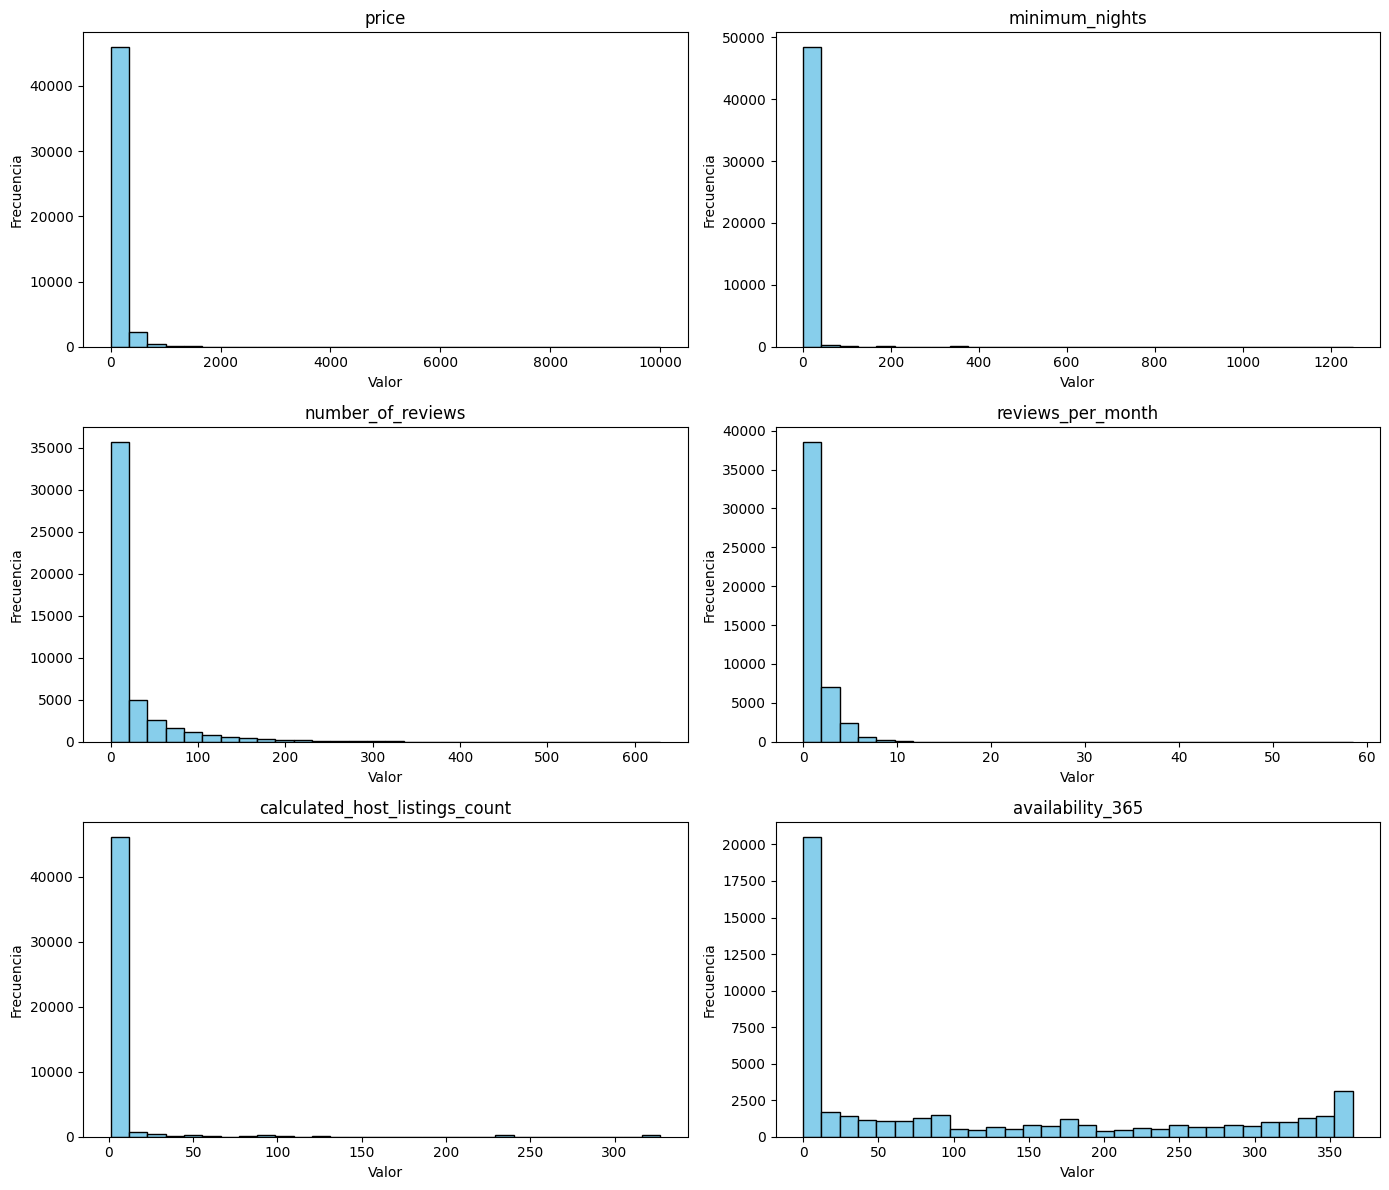

In [8]:
# Gráficos 2 por fila
n_cols = 2
n_rows = (len(airbnb_numeric_cols) + 1) // n_cols

plt.figure(figsize=(14, n_rows * 4))

for i, col in enumerate(airbnb_numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df_final[col], bins=30, color="skyblue", edgecolor="black")
    plt.title(col)
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

### Conclusiones del análisis de variables numéricas (Airbnb)

Tras analizar el resumen estadístico y los histogramas de las principales variables numéricas del dataset de Airbnb, se pueden extraer las siguientes conclusiones:

#### **1. Precio (`price`)**
- La mayoría de alojamientos se sitúan en precios bajos–moderados.
- El histograma muestra una concentración fuerte por debajo de 200 dólares.
- Existen valores muy altos (máximos superiores a 1.000 $), lo que indica la presencia de alojamientos premium o atípicos.
- La distribución es claramente asimétrica hacia la derecha.

#### **2. Mínimo de noches (`minimum_nights`)**
- El valor mínimo es 1, pero aparecen valores muy altos (incluso > 1.000).
- Estos outliers probablemente pertenecen a alojamientos configurados para reservas muy largas o errores de entrada.
- La mayoría de propiedades permite estancias cortas, pero este comportamiento extremo debe considerarse en el análisis posterior.

#### **3. Número de reseñas (`number_of_reviews`)**
- La mayoría de alojamientos tienen pocas reseñas.
- Sin embargo, algunos superan ampliamente las 200–300 reseñas, lo que indica una alta rotación o antigüedad en la plataforma.
- La distribución también es muy asimétrica hacia valores bajos.

#### **4. Reseñas por mes (`reviews_per_month`)**
- Muchos alojamientos tienen un valor cercano a 0, algo esperable porque muchos no reciben reseñas cada mes.
- Existen alojamientos muy activos que superan 3 reseñas al mes, pero son minoría.

#### **5. Número de alojamientos por host (`calculated_host_listings_count`)**
- La mayoría de hosts tienen solo una propiedad listada en Airbnb.
- El histograma muestra una cola larga hacia la derecha: existen hosts con 10, 20 o más alojamientos.
- Esto confirma que Airbnb combina:
  - *anfitriones particulares* (1 alojamiento)
  - *anfitriones profesionales* (múltiples alojamientos)

#### **6. Disponibilidad anual (`availability_365`)**
- Hay una distribución muy amplia: desde alojamientos disponibles solo unos días hasta otros disponibles todo el año.
- Se observa un grupo numeroso cercano a 0, que podría corresponder a:
  - alojamientos inactivos
  - propiedades reservadas casi siempre
  - viviendas solo disponibles en temporadas concretas


### Conclusión general
En conjunto, las variables numéricas de Airbnb presentan distribuciones muy asimétricas, con concentraciones fuertes en valores bajos y colas largas hacia valores altos.
Los precios, las reseñas y la disponibilidad muestran patrones interesantes que posteriormente se pueden cruzar con variables como tipo de habitación o borough para entender mejor el comportamiento del mercado.

## 5.2 Análisis de Variables Numéricas del Censo (NYC Census)

En este apartado analizamos las principales variables numéricas procedentes del dataset socioeconómico `df_census_borough`.

Este dataset contiene información agregada por *borough* (Bronx, Brooklyn, Manhattan, Queens y Staten Island), incluyendo indicadores como:

- **Income** (ingreso medio)
- **Poverty** (tasa de pobreza)
- **Unemployment** (desempleo)
- **IncomePerCap** (ingreso per cápita)
- **MeanCommute** (tiempo medio de desplazamiento al trabajo)
- **Hispanic / White / Black / Asian** (porcentajes de población)

Dado que solo existen 5 boroughs, este análisis no busca patrones estadísticos complejos, sino una comparación visual entre zonas de la ciudad para identificar diferencias socioeconómicas relevantes que puedan relacionarse después con los patrones de Airbnb (precios, actividad, disponibilidad, etc.).

Se realizarán:

- Resumen estadístico de las variables numéricas  
- Gráficos de barras comparando boroughs  
- Identificación preliminar de desigualdades entre zonas

Las conclusiones se añadirán después, una vez generados los gráficos.

In [11]:
# ------------------------------------------
# 5.2 ANÁLISIS DE VARIABLES NUMÉRICAS (CENSO)
# ------------------------------------------

# Selección de columnas numéricas (todas excepto la columna borough)
census_numeric_cols = [
    col for col in df_census_borough.columns
    if col != 'Neighbourhood_Group' and df_census_borough[col].dtype in ["float64", "int64"]
]

print("Columnas numéricas del censo:")
display(census_numeric_cols)

# ----- RESUMEN ESTADÍSTICO -----
print("\n===== RESUMEN ESTADÍSTICO (CENSO) =====")
display(df_census_borough[census_numeric_cols].describe().T)


Columnas numéricas del censo:


['TotalPop',
 'Men',
 'Women',
 'Hispanic',
 'White',
 'Black',
 'Native',
 'Asian',
 'Citizen',
 'Income',
 'IncomeErr',
 'IncomePerCap',
 'IncomePerCapErr',
 'Poverty',
 'ChildPoverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'MeanCommute',
 'Employed',
 'PrivateWork',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment']


===== RESUMEN ESTADÍSTICO (CENSO) =====


,count,mean,std,min,25%,50%,75%,max
TotalPop,5.0,4203.346,913.328598,3410.33,3439.67,4213.44,4295.28,5658.01
Men,5.0,2003.344,423.226450,1614.98,1667.35,1983.62,2079.12,2671.65
Women,5.0,2200.002,491.468268,1772.32,1795.35,2216.16,2229.82,2986.36
Hispanic,5.0,27.584,14.268568,18.26,18.54,22.65,26.01,52.46
White,5.0,37.334,18.507274,12.92,27.34,37.30,48.19,60.92
Black,5.0,20.884,9.039277,10.84,13.88,19.39,28.98,31.33
Native,5.0,0.184,0.055045,0.09,0.18,0.21,0.22,0.22
Asian,5.0,11.498,7.064373,3.78,7.75,11.04,12.23,22.69
Citizen,5.0,2722.968,822.016026,2044.68,2104.50,2419.81,3028.71,4017.14
Income,5.0,62257.234,16813.140127,39311.20,54264.91,62336.88,72021.23,83351.95


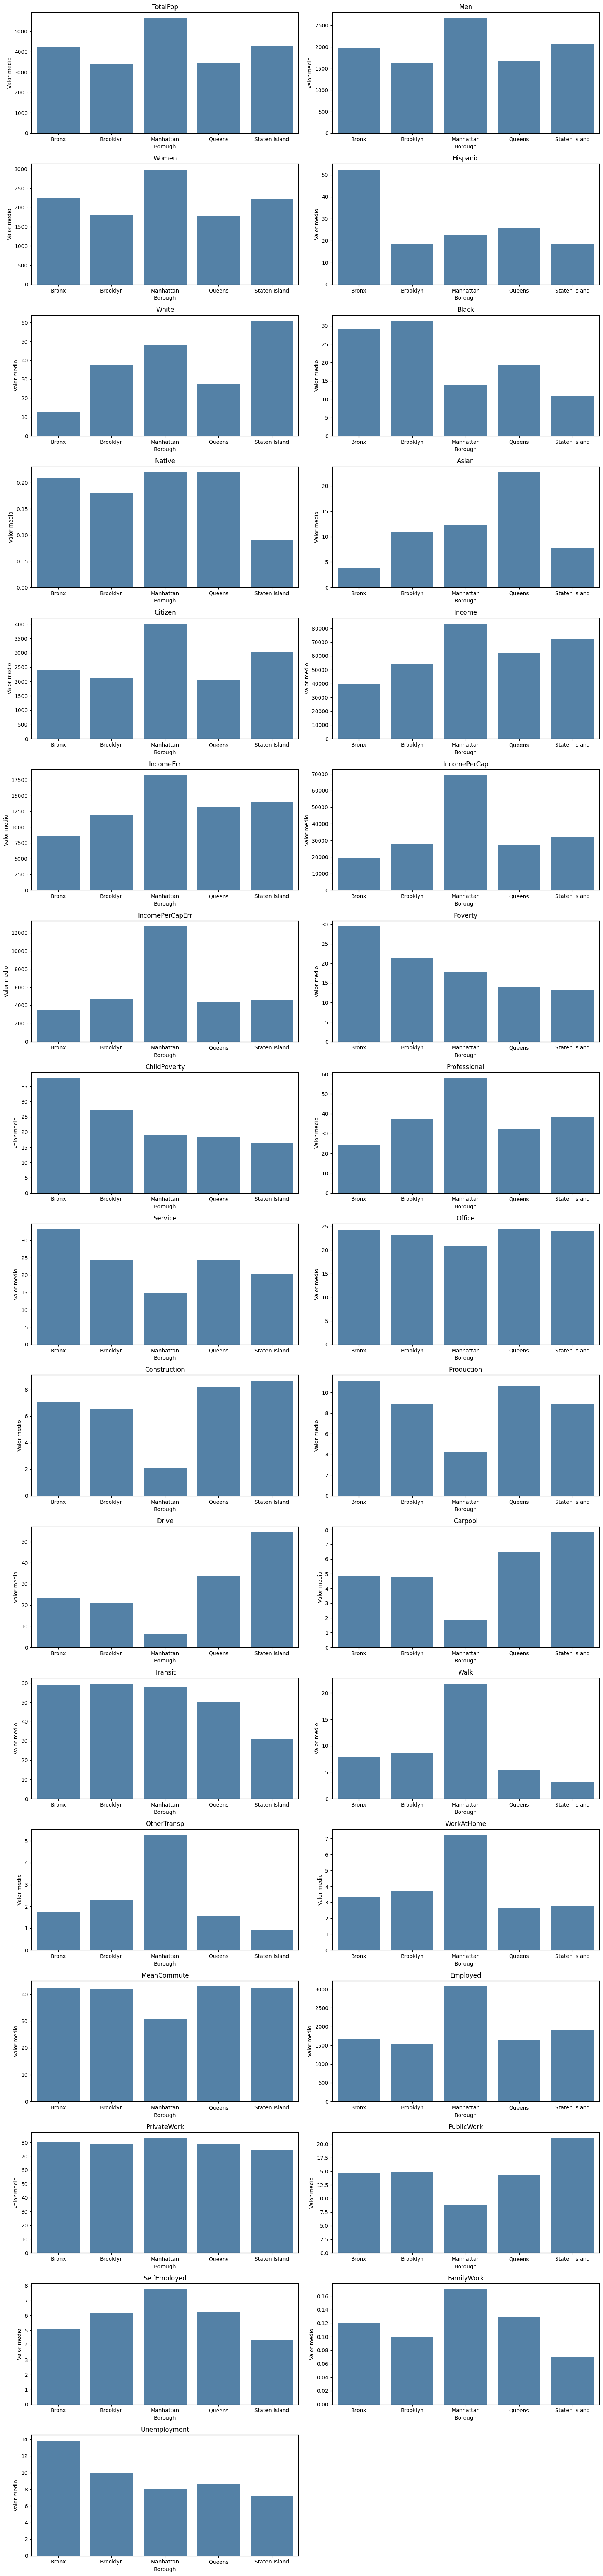

In [15]:
# ----- Gráficos comparativos -----

n_cols = 2
n_rows = (len(census_numeric_cols) + 1) // n_cols

plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(census_numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.barplot(
        data=df_census_borough,
        x='neighbourhood_group',
        y=col,
        color="steelblue"
    )
    plt.title(col)
    plt.xlabel("Borough")
    plt.ylabel("Valor medio")

plt.tight_layout()
plt.show()


### Conclusiones del análisis socioeconómico por borough

A partir de los gráficos obtenidos, se observan varias diferencias interesantes entre los boroughs de Nueva York:

#### 1. Población
- Brooklyn y Queens son los boroughs con más habitantes.
- Staten Island es el menos poblado, algo que también se nota en su menor actividad comparado con el resto.

#### 2. Ingresos y situación económica
- Manhattan es claramente el borough con los ingresos más altos, tanto a nivel familiar como por persona.
- Bronx tiene los ingresos más bajos, y también los niveles más elevados de pobreza.
- Brooklyn y Queens quedan en un punto intermedio, sin valores tan extremos.

#### 3. Composición demográfica
- Bronx tiene una proporción alta de población hispana y afroamericana.
- Manhattan concentra más población blanca y asiática.
- Queens es el más diverso, con porcentajes más equilibrados entre grupos.

#### 4. Mercado laboral
- Manhattan destaca por tener más empleos de tipo profesional y de oficina.
- Bronx y Staten Island tienen más presencia de trabajos relacionados con servicios o construcción.
- La proporción de personas autónomas es algo mayor en Manhattan y Brooklyn.

#### 5. Transporte y desplazamientos
- En Manhattan, mucha gente se mueve en transporte público o caminando, lo que encaja con su alta densidad y buena conectividad.
- En cambio, Staten Island depende mucho más del coche, lo que refleja que es un área más residencial.
- Bronx y Queens quedan en una posición intermedia.

#### 6. Empleo y desempleo
- Manhattan es el borough con más población empleada (en promedio).
- Bronx destaca por tener la tasa de desempleo más alta.


### Resumen general
Los datos muestran diferencias bastante marcadas entre boroughs:

- Manhattan es el borough más acomodado y con mayor nivel laboral y económico.  
- Bronx presenta más dificultades económicas y sociales.  
- Brooklyn y Queens están en una situación intermedia y bastante variada según la zona.  
- Staten Island es el más residencial y con mayor uso del coche.

Estas diferencias servirán para entender mejor los patrones del mercado de Airbnb en el análisis posterior.

## 5.3 Análisis descriptivo de variables categóricas

En esta sección se analizan las variables categóricas del dataset final.  
Tras la limpieza realizada anteriormente, únicamente dos columnas categóricas son adecuadas para el análisis:

- neighbourhood_gro: identifica a qué borough pertenece cada alojamiento (5 categorías).
- room_type: tipo de alojamiento (3–4 categorías).

Otras columnas categóricas como name o neighbourhood no se analizan porque contienen miles de valores únicos y no aportarían información útil en un gráfico o tabla resumida.

El dataset socioeconómico, por su parte, no contiene variables categóricas, ya que tras la agregación por borough todas sus columnas relevantes son numéricas.

A continuación se presentan las distribuciones de las variables categóricas seleccionadas.


===== Distribución de neighbourhood_group =====


,proportion
neighbourhood_group,
Manhattan,0.443011
Brooklyn,0.411167
Queens,0.115881
Bronx,0.022313
Staten Island,0.007629


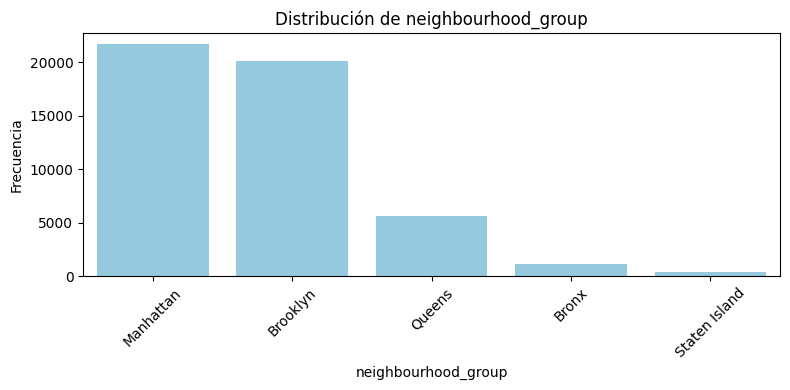


===== Distribución de room_type =====


,proportion
room_type,
Entire home/apt,0.519665
Private room,0.456611
Shared room,0.023724


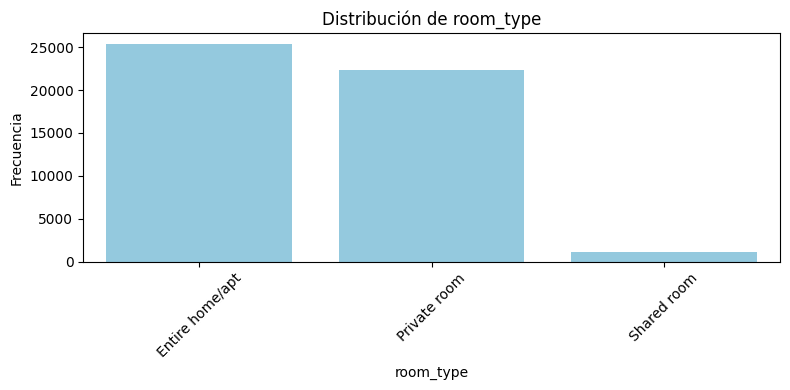

In [16]:
# ================================
# 5.3 ANÁLISIS DE VARIABLES CATEGÓRICAS
# ================================

categorical_cols = ["neighbourhood_group", "room_type"]

for col in categorical_cols:
    print(f"\n===== Distribución de {col} =====")
    display(df_final[col].value_counts(normalize=True).to_frame("proportion"))

    plt.figure(figsize=(8, 4))
    sns.countplot(
        data=df_final, 
        x=col, 
        order=df_final[col].value_counts().index,
        color="skyblue"
    )
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## 5.3 Conclusiones del análisis de variables categóricas

A partir de las distribuciones de `neighbourhood_group` y `room_type`, se pueden extraer varias observaciones relevantes:

### **Distribución por borough**
- La mayoría de alojamientos se concentran en Manhattan (≈44%) y Brooklyn (≈41%), lo que confirma que son las zonas más activas y turísticas de la ciudad.  
- Queens tiene una presencia mucho menor (alrededor del 12%).  
- Bronx y Staten Island representan un porcentaje muy reducido del total de anuncios.  
- En conjunto, esto muestra que la oferta de Airbnb está muy concentrada en zonas de alta demanda turística.

### **Tipos de alojamiento**
- Los alojamientos completos (Entire home/apt) son los más frecuentes (≈52%).  
- Las Private room también tienen bastante presencia (≈46%), lo que indica que muchos anfitriones alquilan habitaciones dentro de su propia vivienda.  
- Los Shared room apenas suponen un 2%, por lo que tienen un peso muy pequeño en la oferta total.

### **Conclusión general del apartado**
Estas variables permiten entender mejor cómo se distribuye la oferta de Airbnb en la ciudad:
- Predominio claro de Manhattan y Brooklyn.  
- Preferencia de los usuarios por alojamientos completos o habitaciones privadas.  
- Muy poca presencia de habitaciones compartidas y de alojamientos en boroughs menos turísticos.

## 5.4 Matriz de correlación y análisis estadístico

En esta parte se analiza cómo se relacionan las variables numéricas entre sí.  
Como en el proyecto estamos trabajando con dos fuentes distintas (Airbnb y datos del censo), se alcula dos matrices de correlación por separado para evitar mezclar escalas y tamaños de muestra que no son comparables.

### 1. Correlación entre variables numéricas de Airbnb
Aquí se revisa si variables como el precio, el número de reseñas o la disponibilidad tienen alguna relación clara entre ellas.  
Esto ayuda a detectar patrones básicos, por ejemplo: si alojamientos con muchas reseñas suelen ser más caros o si los que tienen mayor disponibilidad están menos demandados.

### 2. Correlación entre variables socioeconómicas (datos del censo)
El dataset del censo está agregado por borough, así que solo tiene 5 filas.  
Aun así, permite observar si los indicadores socioeconómicos (ingresos, pobreza, desempleo, etc.) tienden a variar juntos entre zonas de la ciudad.

Cada matriz se calcula por separado y después se representa con un mapa de calor para facilitar la interpretación visual.

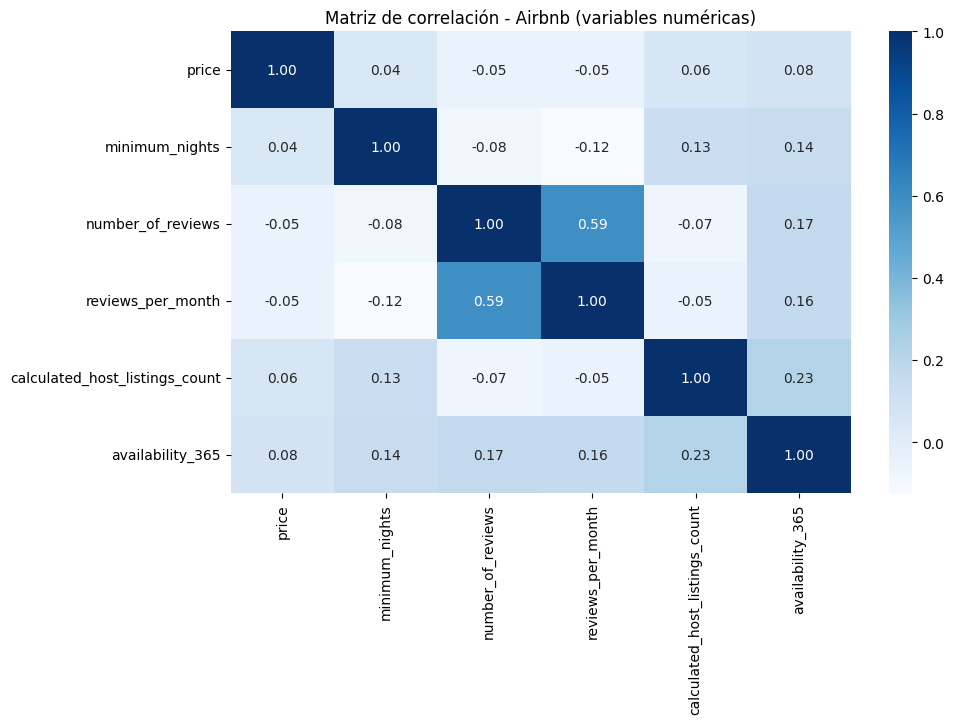

In [27]:
# ==========================================
# 5.4 MATRIZ DE CORRELACIÓN Y ANÁLISIS ESTADÍSTICO
# ==========================================

# ----------- 1) CORRELACIÓN AIRBNB -----------

# Selecciono solo las columnas numéricas originales de Airbnb
airbnb_numeric_cols = [
    "price",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365"
]

corr_airbnb = df_final[airbnb_numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_airbnb, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de correlación - Airbnb (variables numéricas)")
plt.show()

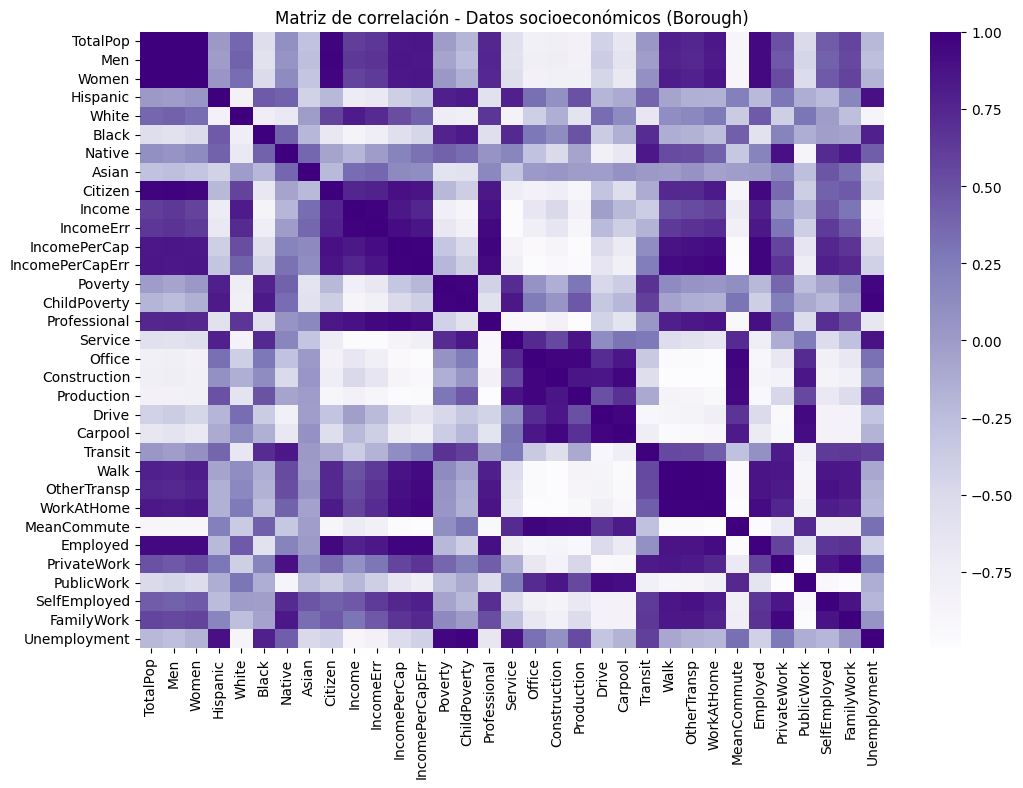

In [28]:
# ----------- 2) CORRELACIÓN CENSUS (AGREGADO POR BOROUGH) -----------

# Selecciono solo columnas numéricas del dataset socioeconómico ya agregado
census_numeric_cols = df_census_borough.select_dtypes(include=["float64", "int64"]).columns

corr_census = df_census_borough[census_numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_census, annot=False, cmap="Purples")
plt.title("Matriz de correlación - Datos socioeconómicos (Borough)")
plt.show()

## 5.4 Conclusiones del análisis de correlaciones

### **Correlaciones en el dataset de Airbnb**

Después de analizar la matriz de correlación de las variables numéricas de Airbnb, se observan los siguientes puntos:

- **El precio no muestra una relación fuerte con ninguna de las otras variables numéricas.**  
  Las correlaciones con *minimum_nights*, *number_of_reviews*, *reviews_per_month* o *availability_365* son muy bajas.  
  Esto sugiere que el precio depende más de otros factores (como la ubicación o el tipo de alojamiento).

- **Existe una correlación clara entre `number_of_reviews` y `reviews_per_month` (≈0.59).**  
  Tiene sentido: si un alojamiento acumula muchas reseñas, normalmente también recibe reseñas con más frecuencia.

- **`availability_365` tiene una relación débil con `calculated_host_listings_count`.**  
  Podría indicar que los hosts con más propiedades tienden a tener alojamientos más disponibles, pero la relación sigue siendo baja.

En general, las correlaciones son bajas, lo que indica que estas variables numéricas por sí solas no explican completamente el comportamiento del mercado de Airbnb.  

---

### **Correlaciones en los datos socioeconómicos (boroughs)**

En el dataset socioeconómico, solo hay 5 observaciones (un valor por borough). Aun así, se observan algunos patrones:

- Las variables relacionadas con ingresos y nivel económico (Income, IncomePerCap, Professional, etc.) tienden a correlacionar entre sí. Esto es coherente con la estructura socioeconómica de la ciudad.

- Las variables de movilidad y transporte también presentan correlaciones entre ellas. Por ejemplo, boroughs donde más personas usan transporte público suelen tener menos desplazamientos en coche.

- Debido al tamaño reducido del dataset, estas correlaciones no deben interpretarse como conclusiones estadísticas fuertes, sino como una referencia general.

En resumen, las correlaciones ayudan a entender ciertas relaciones internas en los datos, pero no permiten explicar completamente las diferencias entre boroughs ni los precios de Airbnb.

## 5.5 Relación entre variables numéricas y categóricas

En esta sección analizamos cómo varían algunas variables numéricas importantes en función de las categorías principales del dataset:

- **neighbourhood_group** (los 5 boroughs de Nueva York)
- **room_type** (tipo de alojamiento)

El objetivo es ver si estas variables categóricas influyen en aspectos clave como:

- el precio
- el número de reseñas
- la disponibilidad del alojamiento
- la frecuencia con la que los huéspedes dejan reseñas

Este tipo de análisis es útil para observar patrones entre zonas de la ciudad o entre tipos de alojamiento.  
Para ello utilizaremos boxplots, que permiten comparar la distribución de una variable numérica entre diferentes categorías.

A continuación se muestran los gráficos comparativos correspondientes.

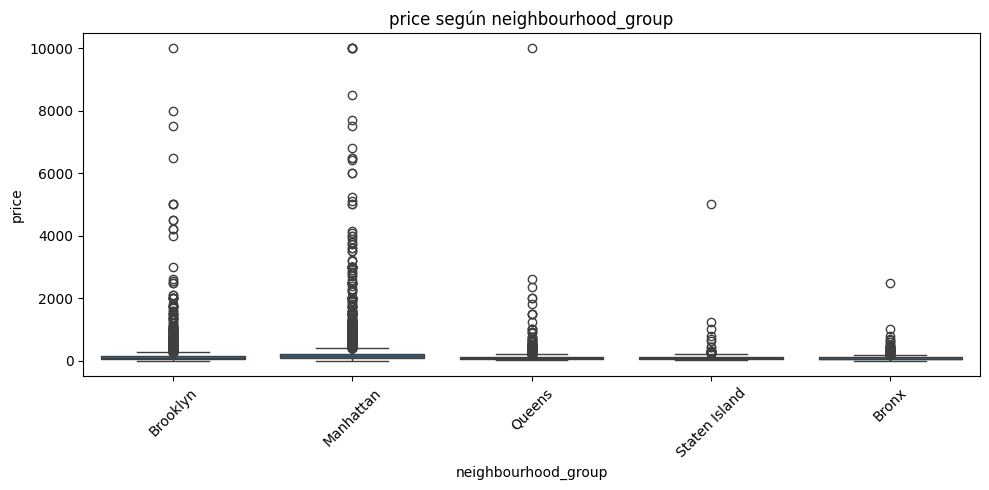

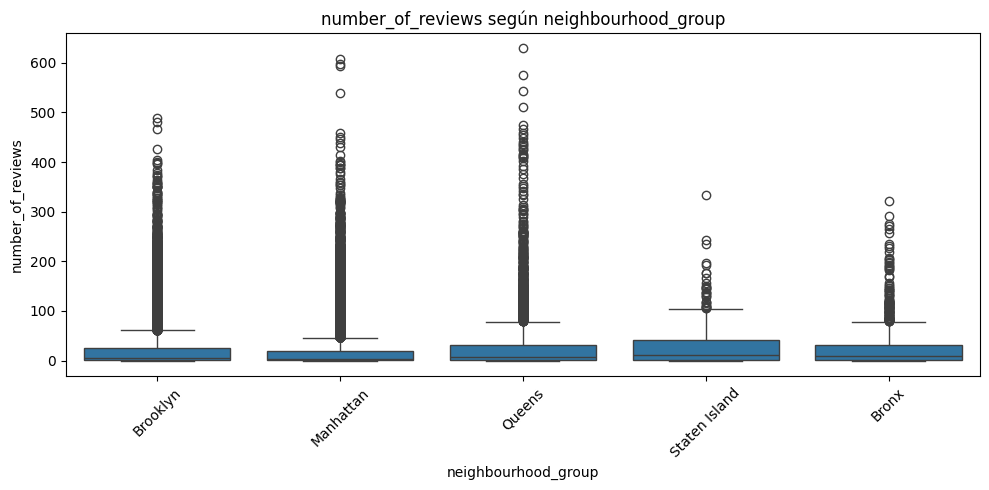

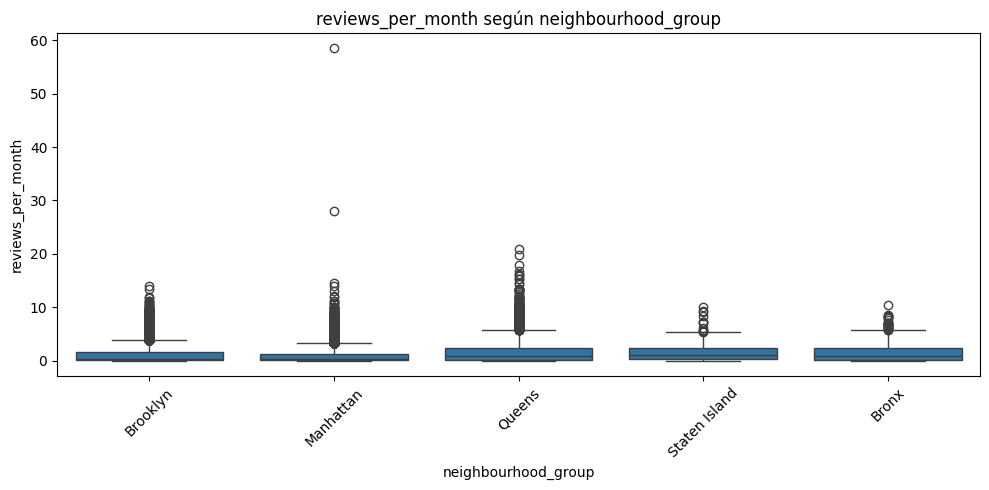

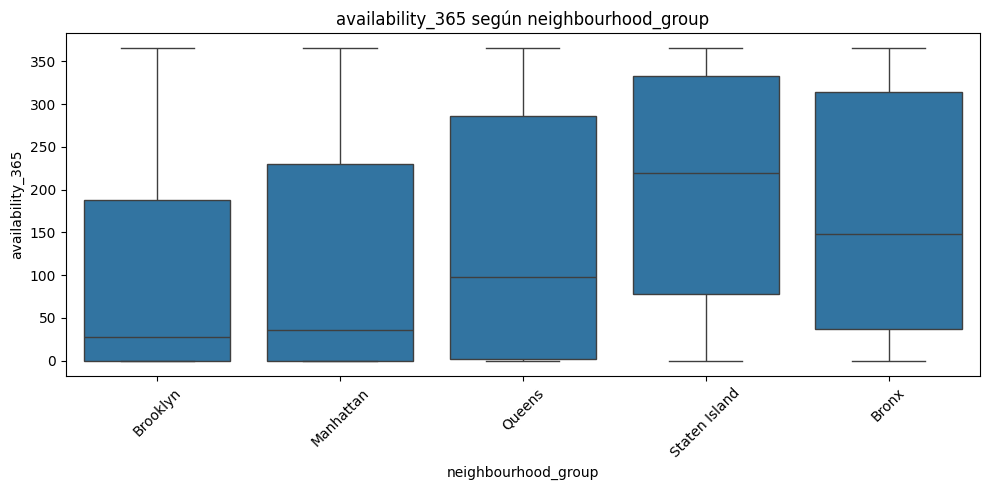

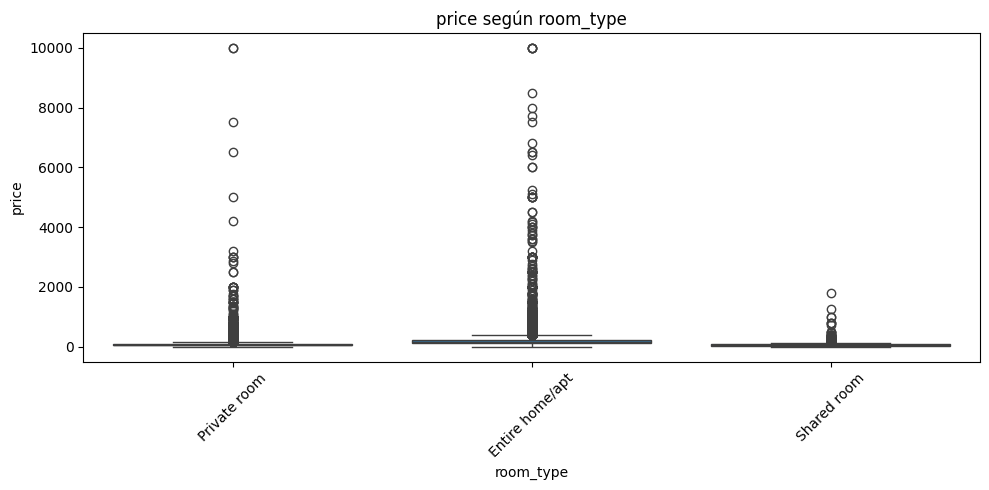

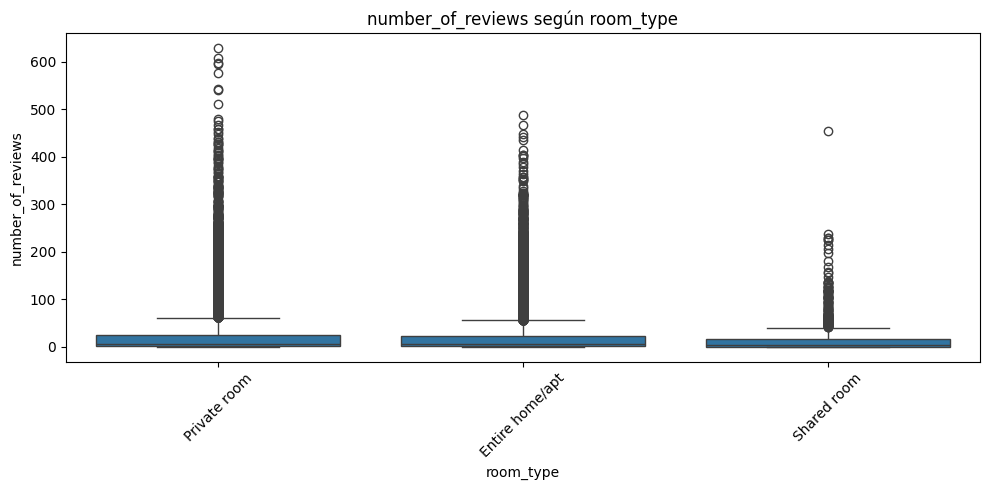

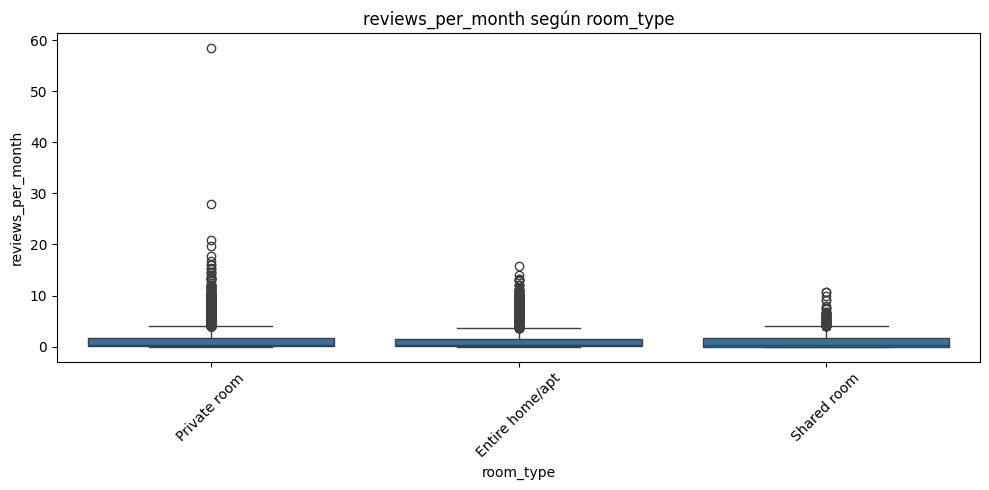

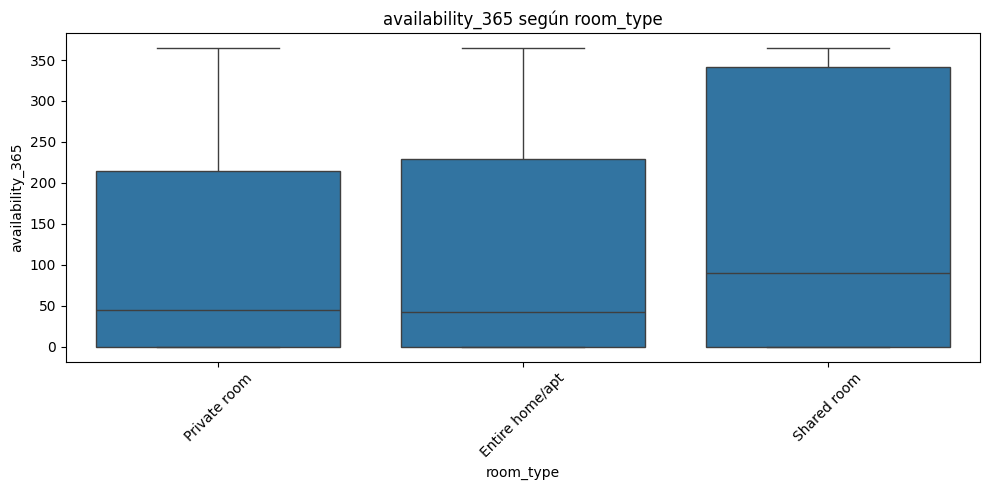

In [29]:
# ------------------------------
# 5.5 RELACIÓN ENTRE VARIABLES NUMÉRICAS Y CATEGÓRICAS
# ------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# Variables categóricas a comparar
categorical_cols = ["neighbourhood_group", "room_type"]

# Variables numéricas principales de interés
numeric_cols = [
    "price",
    "number_of_reviews",
    "reviews_per_month",
    "availability_365"
]

# Crear gráficos
for cat in categorical_cols:
    for num in numeric_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df_final, x=cat, y=num)
        plt.title(f"{num} según {cat}")
        plt.xlabel(cat)
        plt.ylabel(num)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


# Conclusiones — 5.5 Relación entre variables numéricas y categóricas

### 1. Diferencias de precio entre boroughs
- Manhattan es el borough con los precios más altos, seguido de Brooklyn.  
- Queens presenta precios más moderados.  
- Bronx y Staten Island tienen precios bastante más bajos.  
- En todos los boroughs aparecen outliers muy altos, aunque son más frecuentes en Manhattan y Brooklyn.

Las zonas más turísticas y céntricas tienden a tener precios más elevados.

### 2. Diferencias en número de reseñas
- Queens y Manhattan parecen tener alojamientos con más reseñas en comparación con Brooklyn.  
- Bronx y Staten Island tienen menos reseñas en general.  
- Todos los boroughs muestran algunos alojamientos con un número de reseñas muy alto, aunque son casos puntuales.

Queens podría tener más rotación o alojamientos más económicos que atraen más huéspedes.

### 3. Diferencias en reviews_per_month
- Los valores son bajos en todos los boroughs, lo que indica que la mayoría de alojamientos reciben pocas reseñas mensuales.  
- Queens vuelve a destacar ligeramente con algunos valores más altos.

 La actividad mensual no es muy alta en general, pero Queens sobresale un poco.

### 4. Diferencias en availability_365
- Staten Island y Bronx muestran alojamientos con mucha disponibilidad anual.  
- Manhattan y Brooklyn tienen menor disponibilidad, lo que sugiere mayor ocupación.  
- Queens se sitúa en un punto intermedio.

Las zonas más demandadas tienden a estar ocupadas más días al año.

### 5. Diferencias por tipo de alojamiento (room_type)

#### Precio
- Entire home/apt es el tipo más caro.  
- Private room es más económico.  
- Shared room es el más barato, aunque con algunos outliers inesperados.

#### Número de reseñas
- Private room y Entire home/apt tienen distribuciones parecidas, pero Private room muestra más casos con muchas reseñas.  
- Shared room reúne menos reseñas.

#### Reviews per month
- Los valores son bajos en los tres tipos, sin diferencias demasiado grandes.

#### Disponibilidad anual
- Shared room tiene más disponibilidad (posiblemente menor demanda).  
- Entire home/apt y Private room muestran menos días disponibles.

El tipo de alojamiento influye mucho en el precio, pero no tanto en las reseñas mensuales.


## Resumen general del apartado
- Manhattan y Brooklyn concentran los precios más altos y mayor demanda.  
- Queens es una zona intermedia con bastante actividad.  
- Bronx y Staten Island presentan menos movimiento y precios más bajos.  
- El tipo de alojamiento afecta claramente al precio, pero otras métricas (reseñas por mes) no cambian demasiado.  
- La disponibilidad anual muestra diferencias importantes según borough y tipo.

# 6. Conclusiones Finales del Análisis Exploratorio (EDA)

Tras realizar la limpieza, transformación y análisis del dataset final, se pueden extraer varias conclusiones generales sobre el mercado de alojamientos de Airbnb en Nueva York durante 2019. Estas conclusiones se basan tanto en las variables del propio dataset de Airbnb como en la información socioeconómica agregada por borough.

### Precios y distribución en la ciudad
- Manhattan es el borough con los precios más altos, seguido de Brooklyn.
- Queens y el Bronx muestran precios mucho más moderados.
- Staten Island es la zona más económica en general.
- La variabilidad dentro de cada borough es alta, lo que indica que conviven alojamientos baratos con otros mucho más caros.

### Características de los alojamientos
- La mayoría de anuncios se concentran en Brooklyn y Manhattan.
- El tipo de alojamiento más común es *Entire home/apt*, seguido de *Private room*.
- El número mínimo de noches suele ser bajo, aunque existen algunos valores extremos con estancias muy largas.
- El número de reseñas está muy distribuido, con muchos anuncios con pocas reviews y algunos con un número muy alto.

### Actividad de los anfitriones
- La mayor parte de los hosts gestionan solo uno o pocos anuncios.
- Existe un pequeño grupo con muchos alojamientos publicados, lo que sugiere una actividad más profesional dentro de la plataforma.

### Relación con variables socioeconómicas
- Los boroughs con mayores niveles de renta media (Manhattan y Brooklyn) coinciden también con los precios más altos de Airbnb.
- Las diferencias entre boroughs en aspectos como empleo, movilidad o composición demográfica ayudan a contextualizar por qué algunas zonas resultan más caras que otras.
- Aunque la relación no es estrictamente lineal, se observa correspondencia entre áreas más acomodadas y mayor precio medio del alojamiento.

### Correlaciones entre variables
- No aparecen correlaciones lineales fuertes entre las variables numéricas de Airbnb.
- El precio depende de múltiples factores combinados (ubicación, tipo de alojamiento, demanda local), más que de una única variable numérica.
- La disponibilidad anual tampoco guarda una relación directa con el precio o con el número de reseñas.

---

## Resumen general
En conjunto, el análisis exploratorio muestra que el mercado de Airbnb en Nueva York:

- depende fuertemente del borough, especialmente en cuanto al precio;
- es muy diverso, con distintos tipos de alojamientos y niveles de actividad por parte de los anfitriones;
- está influido por características socioeconómicas, aunque no siempre de forma lineal.

Estas conclusiones servirán como base para el dashboard en Power BI y para interpretar mejor el comportamiento del mercado de alojamientos turísticos en la ciudad.

## 7. Exportación del Dataset Final para Power BI

Una vez completado el proceso de limpieza, transformación y unión de los datasets, es necesario guardar el dataset final en un archivo listo para ser importado a Power BI.

Este archivo contendrá:

- Variables originales de Airbnb ya limpias
- Información socioeconómica agregada por borough
- Todas las columnas necesarias para el análisis visual en el dashboard

Además, antes de exportarlo se eliminan saltos de línea y caracteres que puedan causar errores al cargar el CSV en Power BI.

In [ ]:
# Copia del dataframe final
df_export = df_final.copy()

# Eliminar saltos de línea y caracteres problemáticos en todas las columnas tipo texto
for col in df_export.select_dtypes(include="object").columns:
    df_export[col] = (
        df_export[col]
        .astype(str)
        .str.replace("\n", " ", regex=False)
        .str.replace("\r", " ", regex=False)
        .str.replace(";", ",", regex=False)
        .str.strip()
    )

# Ruta de salida
processed_path = "../data/processed/"
output_file = processed_path + "airbnb_nyc_final.csv"

# Exportación del CSV final

df_export.to_csv(
    output_file,
    index=False,
    encoding="utf-8",
    sep=",",
    quoting=1
)

print(f"Dataset final guardado correctamente en: {output_file}")
print(df_final.shape)

Dataset final guardado correctamente en: ../data/processed/airbnb_nyc_final.csv
(48895, 47)


## 8. Dashboard en Power BI

Una vez generado el dataset final, se diseñó un dashboard en Power BI para visualizar de forma sencilla la información más relevante del mercado de Airbnb en Nueva York.  
El dashboard se organiza en tres páginas, cada una centrada en un aspecto distinto del análisis: oferta, precios y perfil socioeconómico.

### 8.1 Página 1 – Resumen general de Airbnb NYC

Esta página ofrece una visión global del mercado. Incluye:

- **KPIs principales:**
  - Total de alojamientos  
  - Precio medio  
  - Media de reseñas  
  - % de alojamientos con alta ocupación  

- **Gráfico donut: distribución por tipo de alojamiento**  

- **Mapa interactivo de alojamientos (Azure Maps)**  
  Cada punto representa un anuncio. El color indica la zona (Manhattan, Brooklyn, Queens, Bronx y Staten Island).

- **Gráfico de barras: precio medio por zona**  
  Resume el precio medio en cada zona, lo que permite ver rápidamente qué borough es más caro y cuál es más económico.

Esta primera página sirve como pantalla de resumen para entender la estructura general del mercado.


### 8.2 Página 2 – Análisis de precios

La segunda página se centra en cómo se comportan los precios. Elementos principales:

- **Boxplot de precio por tipo de alojamiento y zona**  
  Permite ver la dispersión de precios, la mediana y los valores atípicos para cada combinación de zona y tipo de alojamiento.

- **Histograma de precios**  
  Muestra la distribución de precios (agrupados cada 200$) y ayuda a identificar en qué rangos se concentran la mayoría de los anuncios.

- **Gráfico de barras: precio medio por tipo de alojamiento y zona**  


### 8.3 Página 3 – Perfil socioeconómico y relación con Airbnb

En la tercera página se combinan los datos socioeconómicos con la información de Airbnb para buscar posibles relaciones entre ambos. Incluye:

- **KPIs socioeconómicos:**
  - Ingreso medio  
  - % de pobreza  
  - % de población profesional  
  - % de desempleo  

- **Gráfico de barras: ingreso medio vs precio medio por zona**  
  Muestra juntos el ingreso medio y el precio medio de los alojamientos en cada zona.

- **Gráfico de barras: % de alojamientos vs % de pobreza**  
  Compara el peso de los alojamientos de Airbnb con el nivel de pobreza de cada zona.

- **Gráfico de dispersión: disponibilidad vs desempleo**  
  Relaciona la disponibilidad media de los alojamientos con el % de desempleo.

- **Gráfico de barras: profesionales vs precio medio**  
  Compara el porcentaje de población profesional con el precio medio de los alojamientos en cada borough.

Esta página permite ver si las zonas con mayor nivel económico, menor pobreza o más profesionales tienden a tener alojamientos más caros o con distinta disponibilidad.


### 8.4 Resumen del dashboard

El dashboard de Power BI complementa el análisis en Python y permite:

- Explorar de forma interactiva la oferta de Airbnb en Nueva York.  
- Analizar la estructura de precios por tipo de alojamiento y por borough.  
- Relacionar el mercado de Airbnb con indicadores socioeconómicos básicos de la ciudad.

De esta forma, el dashboard sirve como una herramienta visual para apoyar las conclusiones del proyecto.

## 9. Conclusiones finales del proyecto

Después de todo el proceso de limpieza, análisis y visualización de los datos, podemos resumir las conclusiones más importantes del estudio sobre Airbnb en la ciudad de Nueva York.

### 1. Distribución de la oferta de alojamientos
La mayor parte de los anuncios se concentran en Manhattan y Brooklyn, que juntos reúnen más del 80% del total.  
Esto refleja que son las zonas más demandadas tanto por turistas como por anfitriones.  
Zonas como Staten Island o el Bronx apenas representan una parte muy pequeña del mercado.

### 2. Comportamiento de los precios
El análisis confirma que:
- Manhattan es la zona más cara, con precios medios muy superiores al resto.  
- Brooklyn ocupa la segunda posición.  
- Queens, Bronx y Staten Island muestran precios más moderados.

Además, los tipos de alojamiento 'entire home/apt' son, con diferencia, el tipo de alojamiento más caro, mientras que los shared rooms son los más económicos.

### 3. Actividad de los usuarios (reseñas)
Vimos que la mayoría de los alojamientos tiene pocas reseñas al mes, lo que indica que no todos los anuncios tienen movimiento continuo.  
Sin embargo, algunos barrios concretos muestran valores más altos, lo que sugiere zonas con mayor rotación turística.

### 4. Relación entre variables socioeconómicas y Airbnb
El cruce con datos del censo permitió identificar algunas tendencias:

- Las zonas con mayor nivel económico (Manhattan y Staten Island) presentan también precios medios más altos.
- En zonas con mayor nivel profesional, el precio de los alojamientos también tiende a ser más elevado.
- La pobreza no parece relacionarse directamente con una mayor o menor presencia de Airbnb, aunque sí se aprecia que las zonas más pobres suelen tener precios más bajos.
- El gráfico de desempleo vs disponibilidad no muestra una relación clara, pero sí permite ver diferencias entre zonas.

Estos resultados indican que, aunque los factores socioeconómicos no explican por completo el comportamiento del mercado de Airbnb, sí ayudan a entender algunas diferencias entre zonas.

### 5. Dashboard en Power BI
El dashboard final permite:
- Explorar la oferta de forma interactiva mediante un mapa.  
- Analizar precios por tipo de alojamiento y zona.  
- Relacionar indicadores sociales y económicos con los datos de Airbnb.  

### Conclusión general

En conjunto, el análisis muestra que el mercado de Airbnb en NYC está muy concentrado en las zonas más turísticas, con precios que reflejan las diferencias socioeconómicas entre las zonas.  
Aunque no todas las variables están directamente relacionadas, combinar información inmobiliaria y social ofrece una visión más completa del comportamiento del mercado.

Este proyecto demuestra la importancia de integrar datos de diferentes fuentes (Airbnb + Census) para obtener conclusiones más sólidas y desarrollar visualizaciones que faciliten la interpretación de los resultados.